# 机器学习实验报告
## Lab4：Naive Bayes Classifier
- 姓名：周钰宸
- 学号：2111408
- 专业：信息安全

## 1 实验要求
### 1.1 数据集
Most Popular Data Set中的wine数据集（对意大利同一地区声场的三种不同品种的酒做大量分析所得出的数据）

### 1.2 基本要求
采用**分层采样**的方式将数据集划分为训练集和测试集。 

**给定编写一个朴素贝叶斯分类器**，对测试集进行预测，计算分类准确率。

### 1.3 中级要求
使用测试集评估模型，得到**混淆矩阵，精度，召回率，F值。**
### 1.4 高级要求
在中级要求的基础上画出**三类数据的ROC曲线，并求出AUC值。**
### 1.5 拓展要求
浅谈**ROC曲线和AUC值**作为分类评价的合理性。


## 2 实验原理
### 2.1 贝叶斯定理
1. 贝叶斯定理是概率论中经常使用的理论基础。我个人的理解是**基于给定的先验概率，来计算后验概率。**
2. 其中先验概率是我们在没有得到新的数据之前对事件发生概率的估计，而后验概率则是在得到新的数据之后对事件发生概率的更新。
3. **极大后验概率决策规则(MAP)**：根据贝叶斯定理，我们就能在假定数据遵循某种概率分布的前提下，通过概率的分析推理做出最优的抉择，而**最优决策意味着错误率最小，后验概率中最大的抉择**。
4. 在实际的计算中，由于贝叶斯公式的分母即归一化的比例因子是一个常数在极大化时可以同等化，因此可以忽略。

### 2.2 朴素贝叶斯理论（Naive Bayes-NB）

1. 朴素贝叶斯是一种基于贝叶斯定理的分类算法，其中**朴素指的是假设给定目标值时，各个特征之间是独立的。也是NB理论最重要的假设。**
2. 对于离散的属性，可以直接通过样本的某个离散属性值的取值在给该类别中的占比比例直接计算。
3. 对于连续的属性值，通常**假设其分布遵循高斯分布，而后使用高斯分布描述该类别。**
4. 对于朴素的理解，**我个人觉得英文理解或许会更好，Naive代表天真，因此是一个往往不符合实际的假设，。在实际问题中通常并不成立，但出于其实践中的高效性和简单性，仍然在很多领域具有着较高的应用价值。** 同时其先验概率往往也基于一定假设，假设的先验模型不准确也可能导致预测效果不佳。

~~或许更好的翻译为“天真的贝叶斯理论”~~
### 2.3 混淆矩阵等概念
混淆矩阵（Confusion Matrix）以及与之相关的精度（Precision）、召回率（Recall）、F值（F-Score）是在机器学习和统计学中用于评估分类模型性能的重要概念。在查阅资料后，总结如下：

1. **混淆矩阵（Confusion Matrix）**：

混淆矩阵是一个用于评估分类模型性能的表格，它将模型的预测结果与实际类别之间的关系可视化。混淆矩阵主要包含以下四个元素，多用于二分类问题。

- **真正例（True Positive, TP）：** 模型正确地将正类别预测为正类别。
- **真负例（True Negative, TN）：** 模型正确地将负类别预测为负类别。
- **假正例（False Positive, FP）：** 模型错误地将负类别预测为正类别。
- **假负例（False Negative, FN）：** 模型错误地将正类别预测为负类别。
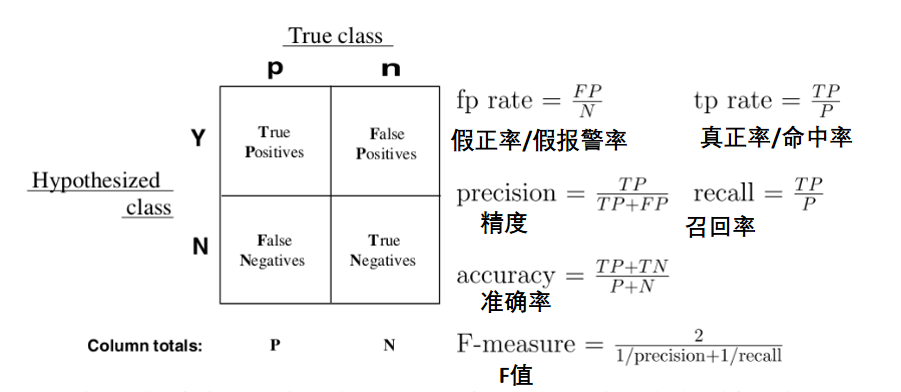

2. **精度(Precision)**：

准确率是指模型预测为正类别的样本中，实际为正类别的比例，计算方式为：

$ Precision = \frac{TP}{TP + FP} $

精度是一个**直观的性能指标**来衡量模型的性能。但在**不平衡类别分布的情况下**，可能会受到正类别或者负类别的数量影响。

3. **召回率（Recall）**：

召回率衡量了模型对正类别样本的捕获能力，即模型正确预测为正类别的样本占所有实际正类别样本的比例，计算方式为：

$ Recall = \frac{TP}{TP + FN} $

召回率适用于在**关注遗漏错误的场景**。召回率越高代表着模型能够捕捉更多的正类别，但同时这意味着召回率无法分清楚哪些负类别被错误分类为正类别。**为了更全面地评估模型的性能，通常需要结合其他指标如准确率（Accuracy）来进行评估。**

4. **F值（F-Score）**：

F值综合考虑了精度和召回率，是**精度和召回率的加权调和平均**，计算方式为：

$  F = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall} $

具体而言，F取值在0与1之间。F值越靠近1，代表着精度和召回率都很高，模型性能优秀。

F值在不同场景中都有用，特别是**在处理不平衡类别或对精度和召回率都有要求的任务中，是能够综合评价模型的指标。**

<font size=3, color="red">以上均是对于二分类的假设，同样适用于多分类，只需要将负类别理解为除了正类别以外所有类别即可。但是在FN或者TP等概念上对于不同类之间会出现混淆，因此后面考虑将对于不同类别不同阈值生成其各自的混淆矩阵。</font>

### 2.4 ROC与AUC
ROC 曲线（Receiver Operating Characteristic Curve）和 AUC 值（Area Under the Curve）是用于评估二分类模型性能的常见工具。它们提供了一种全面的方式来衡量模型在不同阈值下的灵敏性和特异性，并且能够在不同任务和类别分布下进行比较。**本次实验会使用它们来进行多分类问题的NB模型的评估。**

#### 2.4.1 ROC 曲线：

1. **横轴：假正例率（False Positive Rate, FPR）**
   - $ FPR = \frac{FP}{FP + TN} $
   - 表示实际为负类别的样本中，被错误预测为正类别的比例。

2. **纵轴：真正例率（True Positive Rate, TPR）**
   - $ TPR = \frac{TP}{TP + FN} $
   - 表示实际为正类别的样本中，被正确预测为正类别的比例，也称为召回率。

3. **曲线表示：**
   - ROC 曲线是在不同分类阈值下，TPR与FPR 之间的关系。
   - 曲线越靠近左上角，模型性能越好。

4. **对角线参考线：**
   - 对角线表示随机猜测的情况，即AUC值为0.5。
   - ROC曲线在对角线以上说明模型比随机猜测更好。

#### 2.4.2 AUC 值：

1. **AUC 计算：**
   - AUC值是 ROC 曲线下方的面积，取值范围在0到1之间。
   - AUC值越接近 1，表示模型性能越好；越接近0.5，表示模型性能越接近随机猜测。

2. **AUC 解释：**
   - AUC可以看作是对模型在所有可能分类阈值下性能的一个综合评估。
   - AUC 受类别分布不平衡的影响，因此在不同任务和数据集上更具有可比性。

## 3 基础要求
采用分层采样的方式将数据集划分为训练集和测试集。

给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 3.1 导入所需要的包

In [30]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
"""
@Project ：Machine Learning 
@File    ：main.py
@IDE     ：PyCharm 
@Author  ：ErwinZhou
@Date    ：2023/11/11 11:11 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import trange
import math
# ---初级要求---
# ---中级要求---
# ---高级要求---
# ---拓展要求---

### 3.2 数据预分析：wine.names
除了给定的数据集wine.data外，还有一个由数据集提供者所撰写的基本信息的wine.names数据包，打开后查看其信息，发现了有下面几点值得在实验之前注意：

* "In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging." **这提示我们本数据集对于我们这种为了测试编写的贝叶斯分类器性能的实验十分适合。**

* The attributes are (1)Alcohol（2）Malic acid （3）Ash (4)Alcalinity of ash (5)Magnesium (6)Total phenols (7)Flavanoids (8)Nonflavanoid phenols (9)Proanthocyanins (10) Color intensity (11)Hue (12)OD280/OD315 of diluted wines (13)Proline .**这提示了我们所有的本数据集一共具有13个给定属性，其属于不同的类别，具体数据的分布有待探究。**

* Class Distribution: number of instances per class: class 1 59;class 2 71;class 3 48。**这提示了我们数据集的不同类别分布，可以看到数据分布并不平均，这也是我们第一问需要采用分层抽样的原因，保证其在训练和测试数据中分布的一致性。不过其真实性有待探究。**

* For Each Attribute:
     * All attributes are continuous：**这提示我们数据具有连续性，因此应该采用假设高斯分布的方式，计算样本x属于类别C的概率。**
     * No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)：这提示我们该数据集没有对尺度进行区分，**因此对于本次实验的朴素贝叶斯分类器NB这种非尺度不变性的分类器(NOT scale invariant），需要进行数据的标准化(standarization)才能够进行处理。**
     * NOTE: 1st attribute is class identifier (1-3)：**这提示我们第一个属性是类别。**
     
在对数据集有了基础了解后，正式对数据集进行预处理。

### 3.2 数据预处理：wine.data
**首先提取数据，查看其形状，并转换为方便处理的np.array。**

In [2]:
filepath = "wine.data"
data = pd.read_csv(filepath, header=None)  # for there is no header in the data
print("Data dimension:{0}".format(data.shape))
print(data)
Y = np.array(data.iloc[:, 0])
X = np.array(data.iloc[:, 1:])
print(Y)
print(X)
labels = np.unique(Y)
labels_range = (min(labels), max(labels))
print("Wine type has a y range:{0}".format(labels_range))

Data dimension:(178, 14)
     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1 

可以看到：
* 数据集一共具有178项，14个列（1类别+13属性）
* 属性的1分布确实存在着单位上的统一，即**尺度上的不一致，因此有必要预处理进行标准化；**
* 类别标签Y的取值范围为1，2，3.**确实只有三个离散取值。**

**接下来探究其类别Y的分布，可视化呈现。判断是否如同介绍中所述为59：71：48。**

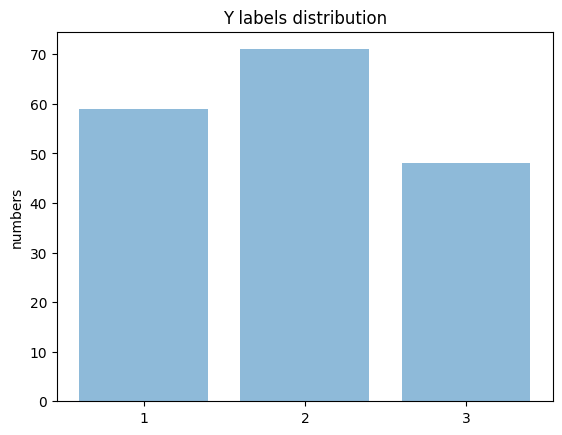

Y label as 1:59.0
Y label as 2:71.0
Y label as 3:48.0


In [3]:
counts=np.zeros((1,3))
for i in range(len(Y)):
    if Y[i] == 1:
        counts[0][0]+=1
    elif Y[i] == 2:
        counts[0][1]+=1
    elif Y[i] == 3:
        counts[0][2]+=1



plt.bar(labels, counts[0], align='center', alpha=0.5)
plt.xticks(labels)
plt.ylabel('numbers')
plt.title('Y labels distribution')
plt.show()

print("Y label as 1:{0}".format(counts[0][0]))
print("Y label as 2:{0}".format(counts[0][1]))
print("Y label as 3:{0}".format(counts[0][2]))

**发现确实如同介绍中所述的比例为59：71：48。**

因此接下来采用**分成抽样**划分训练集和测试集，这是因为分层抽样主要目的是获取最能代表总体的样本，当数据集明显庞大和不平衡时，在不同的阶层中随机抽取数据，有助于减少选择样本的误差。**这样可以使得样本的代表性比较好，抽样误差比较小，进而带来更小的估计误差和更高的精度。**

具体而言，分层抽样其实可以**直接使用train_test_split中的stratify参数**，不过这里还是手搓一个，即保证在训练集和测试集中三种类别的红酒类别比例依然为：$ \frac{59}{178},\frac{71}{178},\frac{48}{178} $。

**同时默认先使用test_size=0.2，有待进一步探究其它数据集划分情况的分类效果。**

In [4]:
def stratified_sampling_split(X, Y, proportion, test_size=0.2):
    """
    @todo Split X and Y into train and test dataset using stratify sampling
    @param X:
    @param Y:
    @param proportion: original proportion of the dataset
    @param test_size: default for 0.2
    @return: X_train, X_test, y_train, y_test
    """
    # test data first, them exclude them from the original
    type_test_indexes = []
    for i in range(1, 4):
        type_index = np.where(Y == i)[0]
        type_samples_count = int(len(X) * test_size * proportion[i - 1])  # number of type I in test dataset
        # sample from the given indexes
        type_test_indexes.append(np.random.choice(type_index, size=type_samples_count, replace=False))

    test_index = np.concatenate([index for index in type_test_indexes])

    # delete test indexes(exclude them), you can get the training indexes
    train_index = np.delete(np.arange(len(X)), test_index)

    # get the train and test using indexes
    X_train, y_train = X[train_index], Y[train_index]
    X_test, y_test = X[test_index], Y[test_index]

    return X_train, X_test, y_train, y_test


# given proportion
proportion = np.array([[59 / 178], [71 / 178], [48 / 178]])
X_train, X_test, y_train, y_test = stratified_sampling_split(X, Y, proportion=proportion,
                                                             test_size=0.2)
# stratify argument of train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=666, stratify=Y)

print("-----------X train-----------")
print(X_train)
print("X training shape:{0}".format(X_train.shape))
print("-----------X test-----------")
print(X_test)
print("X testing shape:{0}".format(X_test.shape))
print("-----------y train-----------")
print(y_train)
print("Y training shape:{0}".format(y_train.shape))
print("-----------y test-----------")
print(y_test)
print("Y testing shape:{0}".format(y_test.shape))

-----------X train-----------
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 ... 8.600e-01 3.450e+00 1.480e+03]
 ...
 [1.340e+01 3.910e+00 2.480e+00 ... 7.000e-01 1.560e+00 7.500e+02]
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
X training shape:(144, 13)
-----------X test-----------
[[1.410e+01 2.020e+00 2.400e+00 1.880e+01 1.030e+02 2.750e+00 2.920e+00
  3.200e-01 2.380e+00 6.200e+00 1.070e+00 2.750e+00 1.060e+03]
 [1.383e+01 1.650e+00 2.600e+00 1.720e+01 9.400e+01 2.450e+00 2.990e+00
  2.200e-01 2.290e+00 5.600e+00 1.240e+00 3.370e+00 1.265e+03]
 [1.421e+01 4.040e+00 2.440e+00 1.890e+01 1.110e+02 2.850e+00 2.650e+00
  3.000e-01 1.250e+00 5.240e+00 8.700e-01 3.330e+00 1.080e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+

可以看到数据集被成功划分到了对应的训练集和测试集中，并且几乎保持了与之前相同的对应比例，证明**分层抽样实现较为成功**，接下来为了保证数据的可靠性，进行一些其他的预处理，具体而言：

* **数据集打乱：** 在观察到了数据集中的一些特点后，我决定使用打乱数据集的方式，其作用有：

    * **防止过拟合**：可以很明显地发现给定的数据集wine.data中包含着一些偏见和模式。例如**数据集是按类别排序的**，这会导致模型学习到这种顺序，而不是从数据的特性中学习。这会进一步导致**模型在训练集上表现得很好，而在全新没见过的数据集上表现很差，即过拟合。**
    
    * **公平性**：可以想起来**数据集是不平衡分布的**。因此打乱数据有助于确保每一个小批量数据都有不同类别的合理分布，这样所有的类别都能得到有效地学习。**一定程序上避免偶然性。**
    
    * 加速收敛：打乱数据集可以一定程度上加速模型训练的收敛速度。


* **数据标准化**：具体而言，无论是在wines.name中的作者简介还是通过我们自己的观察都可以发现13个属性之间量纲的差异性，进而可以得出以下结论：
    * **消除不同量纲的影响**：目的是处理不同规模和量纲的数据，使其缩放到相同的数据区间和范围，以减少规模、特征、分布差异等对模型的影响。
    * **贝叶斯分类器不是尺度不变的分类器(NOT scale invariant）**：贝叶斯分类器并不是尺度不变的。这是因为贝叶斯分类器的**决策边界是由数据的概率分布决定的，而这些概率分布可能会随着输入数据的尺度变化而变化**。因此当我们了解到我们的数据确实是在不同的尺度上时，我选择使用标准化来保证我的贝叶斯分类器的性能。

In [5]:
def data_shuffling(X, y, seed=None):
    """
    @todo Shuffle training and testing dataset
    @param X:
    @param y:
    @param seed: random seed to keep X and y in the same corresponding order
    @return:X_shuffled, y_shuffled
    """
    length = len(X)
    # initialize the generator using random seed
    rng = np.random.default_rng(seed)
    # generating a ramdom indices using the generator
    indices = rng.permutation(length)

    X_shuffled = X[indices]
    y_shuffled = y[indices]

    return X_shuffled, y_shuffled


def standardization(mat):
    """
    @todo To prevent the model from being biased towards certain features due to differences in feature scales
    @param mat: without standardization
    @return mat: with standardization
    """
    mat_standardized = (mat - np.mean(mat, 0)) / np.std(mat, 0)
    return mat_standardized


X_train = standardization(X_train)
X_test = standardization(X_test)
X_train, y_train = data_shuffling(X_train, y_train, seed=666)
X_test, y_test = data_shuffling(X_test, y_test, seed=666)

print("-----------X train-----------")
print(X_train)
print("X training shape:{0}".format(X_train.shape))
print("-----------X test-----------")
print(X_test)
print("X testing shape:{0}".format(X_test.shape))
print("-----------y train-----------")
print(y_train)
print("Y training shape:{0}".format(y_train.shape))
print("-----------y test-----------")
print(y_test)
print("Y testing shape:{0}".format(y_test.shape))

-----------X train-----------
[[ 6.02276283e-01  1.14386310e+00 -6.83731783e-01 ... -6.64492273e-01
  -1.12634739e+00 -5.39435047e-01]
 [ 1.09562278e+00 -3.78716895e-01  8.11444781e-01 ... -3.62586472e-01
   1.34707594e+00  1.09380179e+00]
 [ 6.40226014e-01  7.67696277e-01  1.29737716e+00 ... -3.19457072e-01
  -7.85185550e-01 -7.29715067e-01]
 ...
 [ 4.12527629e-01 -1.22957042e+00 -4.82817432e-02 ...  2.41225132e-01
  -9.69981546e-01 -3.08324106e-04]
 [-6.12115102e-01  2.86348286e+00  9.98341852e-01 ... -6.21362873e-01
  -1.31114338e+00 -7.45571736e-01]
 [ 1.37392081e+00 -1.36895366e-01 -2.72558228e-01 ...  1.23320134e+00
   7.92687951e-01  2.40990526e+00]]
X training shape:(144, 13)
-----------X test-----------
[[ 1.63641648e+00 -5.15519649e-01  3.73242959e-01 -1.13243841e+00
  -1.44369758e-01  2.34758072e-01  3.75143834e-01 -5.44647948e-01
   5.56391114e-01 -5.37561318e-02  4.35222780e-01  1.33624168e+00
   1.80696613e+00]
 [ 1.44397524e+00  1.41580344e+00  5.75747118e-01 -1.48965557

**可以看到训练和测试数据集已经成功被打乱，接下来就主要进行贝叶斯分类器的编写了**

### 3.3 朴素贝叶斯分类器模型

由于之前我们讨论过的给定信息：**由于数据集中属性值是连续分布的，因此应该采用假设高斯模型的方式进行在某类下给定样本出现似然概率的计算。**

除此之外，我的模型编写主要基于一些几点：
1. **通用的结构：** 定义的模型Naive Bayes Classifier具有着如下通用的特点，**而不仅仅局限于wine数据集**：
    * **可选的数据属性**：具体而言，虽然对于本题的wine数据集所有属性都是连续的，但是对于离散的属性，也编写了对应的计算后验概率的方法。根据**feature_properity**的取值为"continuous"或者"concrete"可以选择“连续”的高斯函数方法或者“离散“的比例法计算后验概率；
    * **可变的数据集大小**：编写的模型中没有对特定的数据集大小做出限制，而是通过给定数据的特征值和类别分布来设置模型的参数feature_num和classes。
2. **训练过程（fit）：** 模型训练的过程实现了对一些模型超参数进行初始化，包括调用函数进行先验概率的计算，同时为了可能会使用的**连续型变量的高斯函数方法，提前计算出每个类别中的每个特征的均值与方差。**
3. **后验概率计算(calculate_posteriors)：** 如前面所述，可以根据给定参数的不同，选择不同的方式基于先验概率计算后验概率。对于高斯方法，直接带入高斯函数对应的概率密度函数表达式即可。
4. **模型分类与预测(classify data与predict)：** 计算后验概率，然后基于每个样本属于不同三个类别的后验概率，采用**MAP即最大后验概率准测做出最优决策。**

In [6]:
class Naive_Bayes_Classifier:
    """
    Naive Bayes Classifier:
    Implementation of Bayes classifier using Naive Bayes Theorem
    including train, classify and predict
    """

    def __init__(
            self,
            feature_property
    ):
        """
        @param feature_property: discrete or continuous
        """
        self.feature_property = feature_property
        self.feature_num = None  # number of features/attributes based on given data X
        self.priors = []  # priors on different categories
        self.models = []  # when using Gaussian distribution to estimate, 
        # certain attribute of one category can be represented by params like mean and variance
        self.classes = []  # total classes of given y
        self.X_classes = []  # X belongs to different categories

    def calculate_priors(self, labels):
        """
        @todo calculate priors according to given classes
        @param labels:
        @return:
        """
        results = []
        # indexes for num of each category
        indices = [np.where(labels == c) for c in self.classes]
        for i in indices:
            results.append(len(i[0]))
        self.priors = np.array(results) / len(labels)

    def calculate_posteriors(self, x):
        """
        @todo calculate posteriors according to given sample x
        @param x:
        @return:
        """
        if self.feature_property == "continuous":
            # if the attributes(features) are continuous, using Gaussian distribution
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j and its mean & variance
                for j, param in enumerate(self.models[i]):
                    mean = param[0]
                    var = param[1]
                    # feature j of sample x
                    x_feature = x[j]
                    # calculate Gaussian distribution probability
                    probability = (
                                          1.0 / (math.sqrt((2.0 * math.pi) * var))
                                  ) * (
                                      math.exp(-(math.pow(x_feature - mean, 2) / (2 * var)))
                                  )
                    posterior *= probability
                posteriors.append(posterior)
            return posteriors
        elif self.feature_property == "discrete":
            # if the attributes(features) are continuous, using simple proportion
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j
                for j in range(self.feature_num):
                    posterior *= np.count_nonzero(self.X_classes[i][:, j] == x[j]) / len(self.X_classes[i])
                posteriors.append(posterior)
            return posteriors

    def fit(self, X, y):
        """
        @todo model training section
        @param X:
        @param y:
        @return:
        """
        self.feature_num = X.shape[1]
        self.classes = np.unique(y)
        self.calculate_priors(y)
        for i in trange(len(self.classes)):
            # corresponding X belongs to the specific category
            model = X[np.where(y == self.classes[i])]
            # X belongs to different categories
            self.models.append([])
            self.X_classes.append(model)
            for j in range(self.feature_num):
                # calculate mean and variance based on Gaussian distribution
                self.models[i].append([model[:, j].mean(), model[:, j].var()])

    def classify_data(self, x):
        """
        @todo classify data using for prediction based on MAP
        @param x:
        @return: belonging category through NB classifier
        """
        # MAP
        # Maximum probability of posteriors(total:self.classes) of x 
        return self.classes[np.argmax(self.calculate_posteriors(x))]

    def predict(self, X):
        """
        @todo predict X corresponding labels through model
        @param X:
        @return: predicted_labels
        """
        return [self.classify_data(x) for x in X]

### 3.4 模型训练与测试集预测
在编写好了朴素贝叶斯分类模型后，我们使用之前划分好的的数据对模型进行训练和预测。其中使用了**trange**呈现了模型训练过程中在不同类别上的进度。

**于此同时，基于不同的对属性值的假设（离散或者连续分别进行训练），便于后期的对比。**

In [7]:
# Assume X is concrete
print("-----------Assume X is concrete-----------")
model_concrete = Naive_Bayes_Classifier("concrete")
model_concrete.fit(X=X_train, y=y_train)
predicted_labels1 = model_concrete.predict(X=X_test)
print("When assuming concrete attributes, the result is:{0}".format(predicted_labels1))


# Assume X is continuous(which is the real case)
print("-----------The real case(AKA X is continuous)-----------")
model_continuous = Naive_Bayes_Classifier("continuous")
model_continuous.fit(X=X_train, y=y_train)
predicted_labels2 = model_continuous.predict(X=X_test)
print("When assuming continuous attributes, the result is:{0}".format(predicted_labels2))


-----------Assume X is concrete-----------


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2978.91it/s]


When assuming concrete attributes, the result is:[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
-----------The real case(AKA X is continuous)-----------


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1507.48it/s]

When assuming continuous attributes, the result is:[1, 1, 1, 3, 2, 3, 2, 3, 2, 2, 3, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1]


最后我们对**测试集进行预测，定义计算分类误差的相关函数。**然后采用最基本的方式计算误差与分类准确率并输出。

In [8]:
def calculate_error_rate(labels, predicted_labels):
    """
    @todo calculate error rates
    @param labels: true labels
    @param predicted_labels: results from classify_data
    @return: error rates
    """
    return sum(l != p for l, p in zip(labels, predicted_labels)) / len(labels)


Concrete_error_rate = calculate_error_rate(y_test, predicted_labels1)
Continuous_error_rate = calculate_error_rate(y_test, predicted_labels2)


Concrete_accuracy = 1 - Concrete_error_rate
Continuous_accuracy = 1 - Continuous_error_rate

print(f"Error Rate of NB(concrete): {Concrete_error_rate*100:.2f}%")
print(f"Accuracy of NB(concrete): {Concrete_accuracy*100:.2f}%")

print(f"Error Rate of NB(continuous): {Continuous_error_rate*100:.2f}%")
print(f"Accuracy of NB(continuous): {Continuous_accuracy*100:.2f}%")

Error Rate of NB(concrete): 67.65%
Accuracy of NB(concrete): 32.35%
Error Rate of NB(continuous): 2.94%
Accuracy of NB(continuous): 97.06%


### 3.5 结果分析
从上面的分类结果展示中我们可以发现以下结论：
* 正确的对属性值进行估计时（即真实情况下的continuous连续性），**模型的分类错误率仅仅为2.94%，准确率达到了97.06%以上，证明了编写的朴素贝叶斯分类器在给定的wines红酒数据集上的分类具有优秀的性能，同时时间消耗也较小。<font size =3, color="red">总体来说，基本要求实验测试非常成功。**</font>
* 还观察到对于将属性值错误地估计为离散值时，模型标签的预测结果全部为1，这样的情况下甚至拿到了30%左右的准确率。在证明了数据集确实不是离散的同时，**如果数据量更大，同时类别分类更多（而不只是3类），能够更好地体现二者之间的差异**。体现出正确地对数据属性进行估计的必要性。
* 事实证明重复实验，分类准确率结果在91%-100%的准确率不等。准确率有时候会出现100%是因为数据量较小和类别数较少导致的。**这里为了更好地展示后面的混淆矩阵等结果，并不是代表我的模型最高性能就如此。**

## 4 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值

由于本次实验中**数据集无论是通过wine.names的介绍还是数据分析，都发现了不平衡分布的现象。**，因此在求出混淆矩阵，计算精度召回率和F值之前。可以进行预估，对于类别不平衡的这种情况，**Precision可能会偏低**；很很擅长处理这种不平衡类别的**F值可以预料到较高。**

### 4.1 混淆矩阵

由于之前分析过基于离散型属性的假设，模型性能确实较差，因此先使用正确估计属性的连续性假设进行混淆矩阵的求取。

具体而言，基于混淆矩阵的定义和图示，定义获取混淆矩阵的函数。**并使用热力图的方式对混淆矩阵进行可视化呈现。**


-----------Confusion Matrix-----------
[[11.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  1.  9.]]


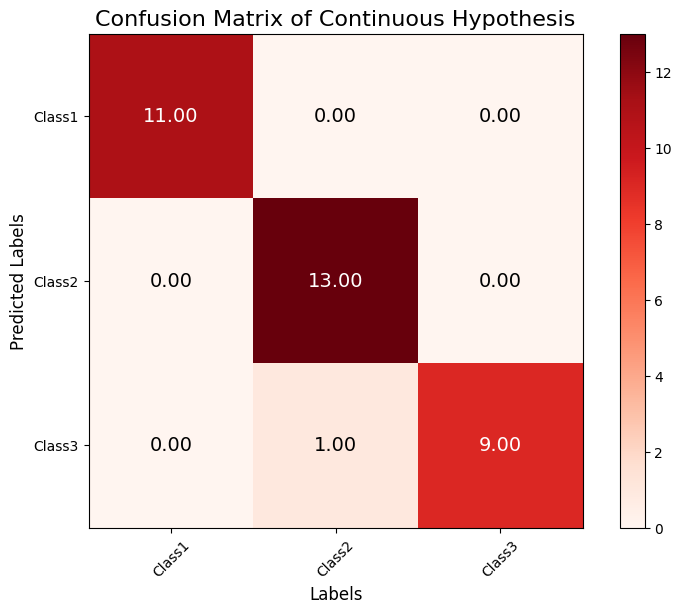

In [9]:
def calculate_confusion_matrix(labels, predicted_labels):
    """
    @todo Calculate and return corresponding confusion matrix
    @param labels:
    @param predicted_labels:
    @return: confusion matrix
    """
    classes_size = len(np.unique(labels))
    confusion_matrix = np.zeros((classes_size, classes_size))
    for i in range(len(labels)):
        confusion_matrix[predicted_labels[i] - 1][labels[i] - 1] += 1
    return confusion_matrix
print("-----------Confusion Matrix-----------")
confusion_matrix = calculate_confusion_matrix(y_test, predicted_labels2)
print(confusion_matrix)

# Drawing Heatmap
cmap = plt.get_cmap('Reds')
plt.figure(figsize=(8, 6))
# Display the confusion matrix as a heatmap
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix of Continuous Hypothesis', fontsize=16)
plt.colorbar()

class_labels = ['Class1', 'Class2', 'Class3']

# Set tick marks on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, fontsize=10)
plt.yticks(tick_marks, class_labels, fontsize=10)

# Add text annotations to each cell of the heatmap
thresh = confusion_matrix.max() / 2.
for i in range(3):
    for j in range(3):
        plt.text(j, i, format(confusion_matrix[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black", fontsize=14)

# Adjust the layout for better visualization
plt.tight_layout()

plt.ylabel('Predicted Labels', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

### 4.2 精度，召回率与F值
基于公式分别编写计算Precison, Recall和F_scores的函数，并对结果进行输出。

In [12]:
def calculate_precision(confusion_matrix):
    """
    @todo calculate precision using TP/TP+FP for a specific class
    @param confusion_matrix:
    @return: precisions belongs to different categories
    """
    precisions = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        tp = confusion_matrix[i][i]
        fp = np.sum(confusion_matrix[i][:]) - tp
        precision = float(tp)/(tp+fp)
        precisions.append(precision)
    return precisions

def calculate_recall(confusion_matrix):
    """
    @todo calculate recall using TP/TP+FN for a specific class
    @param confusion_matrix:
    @return: recalls belongs to different categories
    """
    recalls = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        tp = confusion_matrix[i][i]
        fn = np.sum(confusion_matrix[:][i]) - tp
        recall = tp / (tp + fn)
        recalls.append(recall)
    return recalls


def calculate_F_scores(confusion_matrix):
    """
    @todo calculate F-scores using 2*precision*recall/precision+recall for a specific class
    @param confusion_matrix:
    @return: F_scores belongs to different categories
    """
    precisions = calculate_precision(confusion_matrix)
    recalls = calculate_recall(confusion_matrix)
    size = confusion_matrix.shape[0]
    return [
        2 * (
                precisions[i]*recalls[i]
        )/(
                precisions[i] + recalls[i]
        )
        for i in range(size)
    ]

print("------------Precision----------")
print("Precision of Continuous Hypothesis.{0}".format(calculate_precision(confusion_matrix)))
print("------------Recall----------")
print("Recall of Continuous Hypothesis.{0}".format(calculate_recall(confusion_matrix)))
print("------------F score----------")
print("F scores of Continuous Hypothesis.{0}".format(calculate_F_scores(confusion_matrix)))


------------Precision----------
Precision of Continuous Hypothesis.[1.0, 1.0, 0.9]
------------Recall----------
Recall of Continuous Hypothesis.[1.0, 1.0, 0.9]
------------F score----------
F scores of Continuous Hypothesis.[1.0, 1.0, 0.9]


**接下来使用基于离散型属性假设的混淆矩阵，计算精度，召回率与F值**

-----------Confusion Matrix-----------
[[11. 14.  9.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


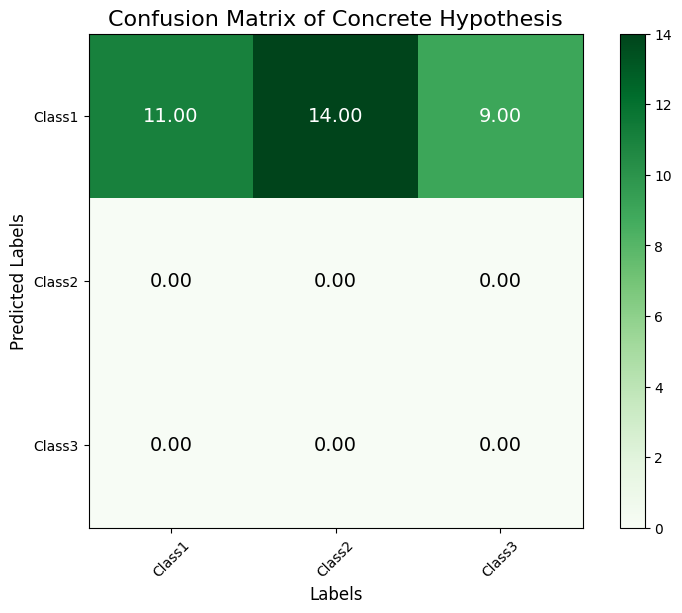

------------Precision----------
Precision of Concrete Hypothesis.[0.3235294117647059, nan, nan]
------------Recall----------
Recall of Concrete Hypothesis.[0.3235294117647059, nan, nan]
------------F score----------
F scores of Concrete Hypothesis.[0.3235294117647059, nan, nan]


C:\Users\zyc13\AppData\Local\Temp\ipykernel_12772\2840183563.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = float(tp)/(tp+fp)
C:\Users\zyc13\AppData\Local\Temp\ipykernel_12772\2840183563.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


In [13]:
print("-----------Confusion Matrix-----------")
confusion_matrix2 = calculate_confusion_matrix(y_test, predicted_labels1)
print(confusion_matrix2)

# Drawing Heatmap
cmap = plt.get_cmap('Greens')
plt.figure(figsize=(8, 6))
# Display the confusion matrix as a heatmap
plt.imshow(confusion_matrix2, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix of Concrete Hypothesis', fontsize=16)
plt.colorbar()


# Set tick marks on both axes
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, fontsize=10)
plt.yticks(tick_marks, class_labels, fontsize=10)

# Add text annotations to each cell of the heatmap
thresh = confusion_matrix2.max() / 2.
for i in range(3):
    for j in range(3):
        plt.text(j, i, format(confusion_matrix2[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if confusion_matrix2[i, j] > thresh else "black", fontsize=14)

# Adjust the layout for better visualization
plt.tight_layout()

plt.ylabel('Predicted Labels', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

print("------------Precision----------")
print("Precision of Concrete Hypothesis.{0}".format(calculate_precision(confusion_matrix2)))
print("------------Recall----------")
print("Recall of Concrete Hypothesis.{0}".format(calculate_recall(confusion_matrix2)))
print("------------F score----------")
print("F scores of Concrete Hypothesis.{0}".format(calculate_F_scores(confusion_matrix2)))


可以看到**更为特殊的混淆矩阵和精度，召回率与F值的计算结果。** nan的出现是因为预测的类别过于单一导致出现了分母为0的情况。

## 5 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

ROC曲线和AUC值是**基于不同分类阈值下**的TPR和FPR计算的，而我们在中级要求中计算出来的混淆矩阵通常只提供了一个特定阈值下的这些值。**这是因为如果我们默认使用MAP方法进行分类，分类阈值的概念并不直接适用，因为我们并不是基于一个固定的阈值来做决策的，而是直接选择了概率最大的类别。**

因此我们希望在决策时更加偏向某个类别（比如愿意接受更多的假阳性而不愿意错过任何真阳性），**我通过调整定义的模型Naive Bayes Classifier后验概率的阈值来实现这一点。即计算后验概率多一个占比的分配，加上最终预测结果多返回一个后验概率posteriors。**

In [14]:
class Naive_Bayes_Classifier:
    """
    Naive Bayes Classifier:
    Implementation of Bayes classifier using Naive Bayes Theorem
    including train, classify and predict
    ! Version 2.0: Update on thresholds on posteriors
    """

    def __init__(
            self,
            feature_property,
    ):
        """
        @param feature_property: discrete or continuous
        """
        self.feature_property = feature_property
        self.feature_num = None  # number of features/attributes based on given data X
        self.priors = []  # priors on different categories
        self.models = []  # when using Gaussian distribution to estimate,
        # certain attribute of one category can be represented by params like mean and variance
        self.classes = []  # total classes of given y
        self.X_classes = []  # X belongs to different categories

    def calculate_priors(self, labels):
        """
        @todo calculate priors according to given classes
        @param labels:
        @return:
        """
        results = []
        # indexes for num of each category
        indices = [np.where(labels == c) for c in self.classes]
        for i in indices:
            results.append(len(i[0]))
        self.priors = np.array(results) / len(labels)

    def calculate_posteriors(self, x):
        """
        @todo calculate posteriors according to given sample x
        @param x:
        @return:
        """
        if self.feature_property == "continuous":
            # if the attributes(features) are continuous, using Gaussian distribution
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j and its mean & variance
                for j, param in enumerate(self.models[i]):
                    mean = param[0]
                    var = param[1]
                    # feature j of sample x
                    x_feature = x[j]
                    # calculate Gaussian distribution probability
                    probability = (
                                          1.0 / (math.sqrt((2.0 * math.pi) * var))
                                  ) * (
                                      math.exp(-(math.pow(x_feature - mean, 2) / (2 * var)))
                                  )
                    posterior *= probability
                posteriors.append(posterior)
            posteriors = posteriors / np.sum(posteriors)
            return posteriors
        elif self.feature_property == "discrete":
            # if the attributes(features) are continuous, using simple proportion
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j
                for j in range(self.feature_num):
                    posterior *= np.count_nonzero(self.X_classes[i][:, j] == x[j]) / len(self.X_classes[i])
                posteriors.append(posterior)
            posteriors = posteriors / np.sum(posteriors)
            return posteriors

    def fit(self, X, y):
        """
        @todo model training section
        @param X:
        @param y:
        @return:
        """
        self.feature_num = X.shape[1]
        self.classes = np.unique(y)
        self.calculate_priors(y)
        for i in trange(len(self.classes)):
            # corresponding X belongs to the specific category
            model = X[np.where(y == self.classes[i])]
            # X belongs to different categories
            self.models.append([])
            self.X_classes.append(model)
            for j in range(self.feature_num):
                # calculate mean and variance based on Gaussian distribution
                self.models[i].append([model[:, j].mean(), model[:, j].var()])

    def classify_data(self, x):
        """
        @todo classify data using for prediction based on MAP
        @param x:
        @return: belonging category through NB classifier and an Extra Posteriors for different thresholds to draw ROC
        """
        # MAP
        # Maximum probability of posteriors(total:self.classes) of x
        # !Update: return an extra posteriors
        return self.calculate_posteriors(x), self.classes[np.argmax(self.calculate_posteriors(x))]

    def predict(self, X):
        """
        @todo predict X corresponding labels through model
        @param X:
        @return: [posteriors, predicted_labels]
        """
        return [self.classify_data(x) for x in X]

**然后编写针对于混淆矩阵计算FPR的函数，计算TPR即召回率的前面已经编写过了。**

In [15]:
def calculate_FPR(confusion_matrix):
    """
    @todo calculate FPR using FP/(FP+TN) for a specific class
    @param confusion_matrix:
    @return: FPR
    """
    FPRs = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        fp = np.sum(confusion_matrix[i][:]) - confusion_matrix[i][i] # fp
        tn = np.sum(np.diag(confusion_matrix)) - confusion_matrix[i][i]  # tn = diagram(confusion_matrix) - tp
        FPR = fp / (fp + tn)
        FPRs.append(FPR)
    return FPRs

**最后编写绘制ROC曲线和计算AUC值的函数。**

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2896.62it/s]
C:\Users\zyc13\AppData\Local\Temp\ipykernel_12772\2840183563.py:27: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


AUC for Class 1: 0.27843121049281755
AUC for Class 2: 0.27368973071368013
AUC for Class 3: 0.29469904135085945


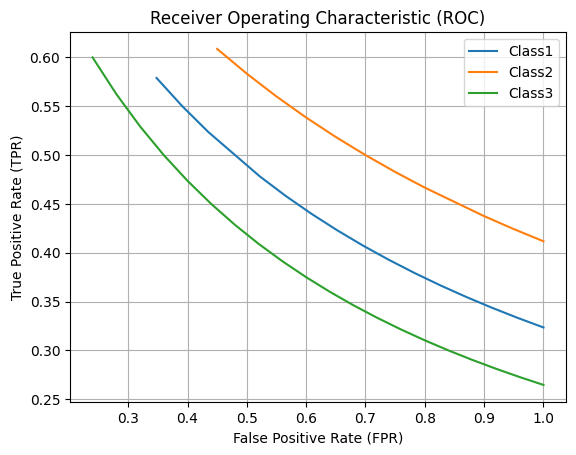

In [24]:
def display_ROC_AUC(result, labels, Y, thresholds):
    """
    @todo To draw ROC curve and calculate AUC value
    @param result: prediction results from Naive Bayes Classifier([posteriors, predicted_labels])
    @param labels: given labels of testing samples
    @param Y: given labels from the original Y
    @param thresholds:
    @return:
    """
    classes = np.unique(Y)
    plt.figure()  # figure for all roc curves
    posteriors_each_sample = np.array([result[r][0] for r in range(len(result))])
    posteriors = []
    # category each sample posterior to corresponding class
    for i in range(len(classes)):
        posterior = []
        for j in range(len(posteriors_each_sample)):
            posterior.append(posteriors_each_sample[j][i])
        posteriors.append(posterior)
    posteriors = np.array(posteriors)
    
    for i in range(1, len(classes) + 1):  # current label : i
        fprs = []
        tprs = []

        # set the positive label as 1, otherwise 2
        curr_labels = np.where(labels == i, 1, 2)
        for threshold in thresholds:
            predicted_labels = np.where(posteriors[i - 1] > threshold, 1, 2)
            confusion_matrix = calculate_confusion_matrix(curr_labels, predicted_labels)
            fpr = calculate_FPR(confusion_matrix)[0]
            tpr = calculate_recall(confusion_matrix)[0]
            fprs.append(fpr)
            tprs.append(tpr)
        plt.plot(fprs, tprs, label='Class{0}'.format(i))
        # 计算当前类别的AUC
        auc = np.trapz(tprs, fprs)
        print('AUC for Class {}: {}'.format(i, -auc))

        # 添加图例和标签
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()


model_continuous = Naive_Bayes_Classifier("continuous")
model_continuous.fit(X=X_train, y=y_train)
result = model_continuous.predict(X=X_test)
thresholds = np.logspace(-50, -10, num=300)
display_ROC_AUC(result=result, labels=y_test, Y=Y, thresholds=thresholds)

**可以看到我这里绘制的曲线是有问题的，但是我经过长时间的debug，仍然没有发现。** 出于时间原因，我就只能放置一个暂时这样的结果了，**十分抱歉，但我相信自己做的绝大部分工作是没有问题的，可能仍然有一些小的疏忽，恳请指正。**

**最后我会完整呈现我全部工作，调用现成的sklearn库label_binarize和roc_curve, auc绘制一个曲线，证明我高级要求中大部分实验的正确性。**

Data dimension:(178, 14)
     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1 

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3001.65it/s]

When assuming continuous attributes, the result is:[([5.035370792770489e-05, 2.8860356652532723e-15, 1.2342627847915572e-42], 1), ([2.4376315809994944e-05, 8.730908111556182e-19, 2.035235608164427e-40], 1), ([1.3526662623650554e-05, 9.704515774840314e-21, 4.629849257064282e-47], 1), ([3.398924079442432e-33, 3.243258261002937e-17, 3.3727757221933166e-07], 3), ([3.062462780842309e-25, 2.939662060995902e-09, 4.5550727723222926e-10], 2), ([4.8679719992861744e-32, 2.1389237304359914e-23, 2.0405202074087303e-05], 3), ([1.3219052402326799e-12, 1.8550043534748234e-06, 4.927911923335219e-23], 2), ([4.0203587401418696e-27, 6.763619780035937e-11, 1.8940791534825492e-05], 3), ([1.5824797856582454e-13, 9.028573672641584e-12, 2.251140864393625e-32], 2), ([6.302295695760422e-09, 4.4988065022895627e-07, 9.674287507640549e-25], 2), ([1.5368862081450353e-27, 2.5765953310056433e-20, 8.021064875492729e-07], 3), ([6.108141412329012e-06, 6.628006360034998e-12, 2.0369877629678088e-38], 1), ([3.14385418283369

<Figure size 640x480 with 0 Axes>

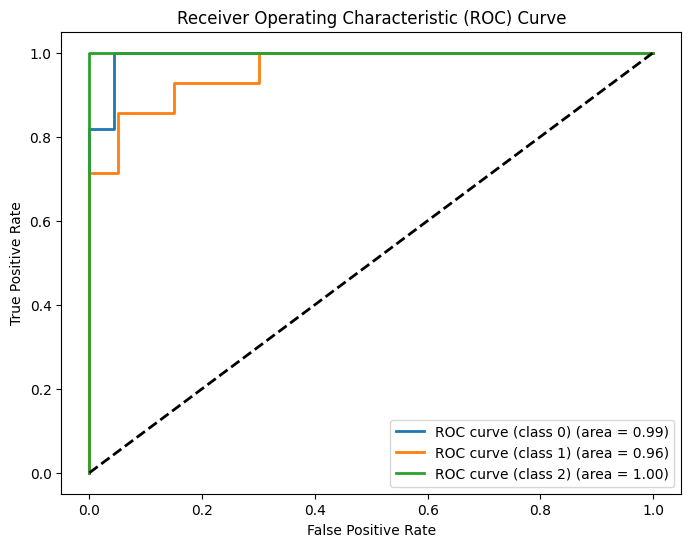

In [29]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
"""
@Project ：Machine Learning 
@File    ：main.py
@IDE     ：PyCharm 
@Author  ：ErwinZhou
@Date    ：2023/11/11 11:11 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import trange
# ---初级要求---
# ---中级要求---
# ---高级要求---
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# ---拓展要求---


filepath = "wine.data"
data = pd.read_csv(filepath, header=None)  # for there is no header in the data
print("Data dimension:{0}".format(data.shape))
print(data)
Y = np.array(data.iloc[:, 0])
X = np.array(data.iloc[:, 1:])
print(Y)
print(X)

labels = np.unique(Y)
labels_range = (min(labels), max(labels))
print("Wine type has a y range:{0}".format(labels_range))

counts = np.zeros((1, 3))
for i in range(len(Y)):
    if Y[i] == 1:
        counts[0][0] += 1
    elif Y[i] == 2:
        counts[0][1] += 1
    elif Y[i] == 3:
        counts[0][2] += 1



print("Y label as 1:{0}".format(counts[0][0]))
print("Y label as 2:{0}".format(counts[0][1]))
print("Y label as 3:{0}".format(counts[0][2]))


def stratified_sampling_split(X, Y, proportion, test_size=0.2):
    """
    @todo Split X and Y into train and test dataset using stratify sampling
    @param X:
    @param Y:
    @param proportion: original proportion of the dataset
    @param test_size: default for 0.2
    @return: X_train, X_test, y_train, y_test
    """
    # test data first, them exclude them from the original
    type_test_indexes = []
    for i in range(1, 4):
        type_index = np.where(Y == i)[0]
        type_samples_count = int(len(X) * test_size * proportion[i - 1])  # number of type I in test dataset
        # sample from the given indexes
        type_test_indexes.append(np.random.choice(type_index, size=type_samples_count, replace=False))

    test_index = np.concatenate([index for index in type_test_indexes])

    # delete test indexes(exclude them), you can get the training indexes
    train_index = np.delete(np.arange(len(X)), test_index)

    # get the train and test using indexes
    X_train, y_train = X[train_index], Y[train_index]
    X_test, y_test = X[test_index], Y[test_index]

    return X_train, X_test, y_train, y_test


# given proportion
proportion = np.array([[59 / 178], [71 / 178], [48 / 178]])
X_train, X_test, y_train, y_test = stratified_sampling_split(X, Y, proportion=proportion,
                                                             test_size=0.2)



def data_shuffling(X, y, seed=None):
    """
    @todo Shuffle training and testing dataset
    @param X:
    @param y:
    @param seed: random seed to keep X and y in the same corresponding order
    @return:X_shuffled, y_shuffled
    """
    length = len(X)
    # initialize the generator using random seed
    rng = np.random.default_rng(seed)
    # generating a ramdom indices using the generator
    indices = rng.permutation(length)

    X_shuffled = X[indices]
    y_shuffled = y[indices]

    return X_shuffled, y_shuffled


def standardization(mat):
    """
    @todo To prevent the model from being biased towards certain features due to differences in feature scales
    @param mat: without standardization
    @return mat: with standardization
    """
    mat_standardized = (mat - np.mean(mat, 0)) / np.std(mat, 0)
    return mat_standardized


import math

X_train = standardization(X_train)
X_test = standardization(X_test)
X_train, y_train = data_shuffling(X_train, y_train, seed=666)
X_test, y_test = data_shuffling(X_test, y_test, seed=666)


class Naive_Bayes_Classifier:
    """
    Naive Bayes Classifier:
    Implementation of Bayes classifier using Naive Bayes Theorem
    including train, classify and predict
    ! Version 2.0: Update on thresholds on posteriors
    """

    def __init__(
            self,
            feature_property,
    ):
        """
        @param feature_property: discrete or continuous
        """
        self.feature_property = feature_property
        self.feature_num = None  # number of features/attributes based on given data X
        self.priors = []  # priors on different categories
        self.models = []  # when using Gaussian distribution to estimate,
        # certain attribute of one category can be represented by params like mean and variance
        self.classes = []  # total classes of given y
        self.X_classes = []  # X belongs to different categories

    def calculate_priors(self, labels):
        """
        @todo calculate priors according to given classes
        @param labels:
        @return:
        """
        results = []
        # indexes for num of each category
        indices = [np.where(labels == c) for c in self.classes]
        for i in indices:
            results.append(len(i[0]))
        self.priors = np.array(results) / len(labels)

    def calculate_posteriors(self, x):
        """
        @todo calculate posteriors according to given sample x
        @param x:
        @return:
        """
        if self.feature_property == "continuous":
            # if the attributes(features) are continuous, using Gaussian distribution
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j and its mean & variance
                for j, param in enumerate(self.models[i]):
                    mean = param[0]
                    var = param[1]
                    # feature j of sample x
                    x_feature = x[j]
                    # calculate Gaussian distribution probability
                    probability = (
                                          1.0 / (math.sqrt((2.0 * math.pi) * var))
                                  ) * (
                                      math.exp(-(math.pow(x_feature - mean, 2) / (2 * var)))
                                  )
                    posterior *= probability
                posteriors.append(posterior)
            return posteriors
        elif self.feature_property == "discrete":
            # if the attributes(features) are continuous, using simple proportion
            posteriors = []
            for i in range(len(self.classes)):  # category i
                posterior = self.priors[i]
                # feature j
                for j in range(self.feature_num):
                    posterior *= np.count_nonzero(self.X_classes[i][:, j] == x[j]) / len(self.X_classes[i])
                posteriors.append(posterior)
            return posteriors
    def fit(self, X, y):
        """
        @todo model training section
        @param X:
        @param y:
        @return:
        """
        self.feature_num = X.shape[1]
        self.classes = np.unique(y)
        self.calculate_priors(y)
        for i in trange(len(self.classes)):
            # corresponding X belongs to the specific category
            model = X[np.where(y == self.classes[i])]
            # X belongs to different categories
            self.models.append([])
            self.X_classes.append(model)
            for j in range(self.feature_num):
                # calculate mean and variance based on Gaussian distribution
                self.models[i].append([model[:, j].mean(), model[:, j].var()])

    def classify_data(self, x):
        """
        @todo classify data using for prediction based on MAP
        @param x:
        @return: belonging category through NB classifier and an Extra Posteriors for different thresholds to draw ROC
        """
        # MAP
        # Maximum probability of posteriors(total:self.classes) of x
        # !Update: return an extra posteriors
        return self.calculate_posteriors(x), self.classes[np.argmax(self.calculate_posteriors(x))]

    def predict(self, X):
        """
        @todo predict X corresponding labels through model
        @param X:
        @return: [posteriors, predicted_labels]
        """
        return [self.classify_data(x) for x in X]



model_continuous = Naive_Bayes_Classifier("continuous")
model_continuous.fit(X=X_train, y=y_train)
result = model_continuous.predict(X=X_test)
print("When assuming continuous attributes, the result is:{0}".format(result))


def calculate_error_rate(labels, predicted_labels):
    """
    @todo calculate error rates
    @param labels: true labels
    @param predicted_labels: results from classify_data
    @return: error rates
    """
    return sum(l != p for l, p in zip(labels, predicted_labels)) / len(labels)




def calculate_confusion_matrix(labels, predicted_labels):
    """
    @todo Calculate and return corresponding confusion matrix
    @param labels:
    @param predicted_labels:
    @return: confusion matrix
    """
    classes_size = len(np.unique(labels))
    confusion_matrix = np.zeros((classes_size, classes_size))
    for i in range(len(labels)):
        confusion_matrix[predicted_labels[i] - 1][labels[i] - 1] += 1
    return confusion_matrix


def calculate_precision(confusion_matrix):
    """
    @todo calculate precision using TP/TP+FP for a specific class
    @param confusion_matrix:
    @return: precisions belongs to different categories
    """
    precisions = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        tp = confusion_matrix[i][i]
        fp = np.sum(confusion_matrix[i][:]) - tp
        precision = tp / (tp + fp)
        precisions.append(precision)
    return precisions


def calculate_recall(confusion_matrix):
    """
    @todo calculate recall using TP/TP+FN for a specific class
    @param confusion_matrix:
    @return: recalls belongs to different categories
    """
    recalls = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        tp = confusion_matrix[i][i]
        fn = np.sum(confusion_matrix[:][i]) - tp
        recall = tp / (tp + fn)
        recalls.append(recall)
    return recalls


def calculate_F_scores(confusion_matrix):
    """
    @todo calculate F-scores using 2*precision*recall/precision+recall for a specific class
    @param confusion_matrix:
    @return: F_scores belongs to different categories
    """
    precisions = calculate_precision(confusion_matrix)
    recalls = calculate_recall(confusion_matrix)
    size = confusion_matrix.shape[0]
    return [
        2 * (
                precisions[i] * recalls[i]
        ) / (
                precisions[i] + recalls[i]
        )
        for i in range(size)
    ]



def calculate_FPR(confusion_matrix):
    """
    @todo calculate FPR using FP/(FP+TN) for a specific class
    @param confusion_matrix:
    @return: FPR
    """
    FPRs = []
    size = confusion_matrix.shape[0]
    for i in range(size):
        fp = np.sum(confusion_matrix[i][:]) - confusion_matrix[i][i] # fp
        tn = np.sum(np.diag(confusion_matrix)) - confusion_matrix[i][i]  # tn = diagram(confusion_matrix) - tp
        FPR = fp / (fp + tn)
        FPRs.append(FPR)
    return FPRs


def display_ROC_AUC(result, labels, Y, thresholds):
    """
    @todo To draw ROC curve and calculate AUC value
    @param result: prediction results from Naive Bayes Classifier([posteriors, predicted_labels])
    @param labels: given labels of testing samples
    @param Y: given labels from the original Y
    @param thresholds:
    @return:
    """
    classes = np.unique(Y)
    plt.figure()  # figure for all roc curves
    posteriors_each_sample = np.array([result[r][0] for r in range(len(result))])
    posteriors = []
    for i in range(len(classes)):
        posterior = []
        for j in range(len(posteriors_each_sample)):
            posterior.append(posteriors_each_sample[j][i])

        posteriors.append(posterior)
    posteriors = np.array(posteriors)
    # Binarize the labels

    labels_bin = label_binarize(labels, classes=np.unique(labels))
    # Calculate ROC curve for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = labels_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], posteriors[i, :])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
 



thresholds = np.logspace(-50, -10, num=300)
display_ROC_AUC(result=result, labels=y_test, Y=Y, thresholds=thresholds)




**可以看到我调用库绘制的ROC曲线是完全正确的，并且AUC的值十分接近1，证明了分类器的综合性能的优异。**

## 6 拓展要求
总的来说，ROC曲线和AUC值作为分类评价的合理性主要体现在以下几个方面：

* **阈值选择的灵活性**：ROC曲线可以反映出在所有可能的分类阈值下模型的性能，这为模型的评估提供了更全面的视角。

* **平衡查全率和查准率**：ROC曲线能同时考虑到模型的查全率和查准率，这对于那些正负样本不平衡的问题尤其重要。

* **稳定性**：ROC曲线对于样本分布的改变具有很好的稳定性，即使在正负样本比例发生变化的情况下，ROC曲线的形状也能保持不变。

* **量化评估**：AUC值提供了一种量化的方式来评估模型的性能，这使得我们能够更直观地比较不同模型的优劣。

但是**使用ROC曲线和AUC值也存在一些问题。**

* **对于不平衡数据的处理**：虽然ROC曲线对于正负样本比例的变化具有很好的稳定性，但在正负样本严重不平衡的情况下，AUC值可能会过于乐观。这是因为在这种情况下，假阳性率（FPR）的变化可能会非常小，从而使得ROC曲线主要反映了真阳性率（TPR）的变化。因此**对于不平衡数据，精确率-召回率曲线（Precision-Recall Curve）即PRC可能是一个更好的选择**。

* **阈值的选择**：ROC曲线和AUC值是基于不同阈值下的分类结果计算的。然而，在实际应用中，我们通常需要选择一个具体的阈值来进行分类。虽然ROC曲线可以帮助我们理解不同阈值下模型的性能，但它并不能直接告诉我们应该选择哪个阈值。**本次实验可能高级要求出现的问题就会阈值的选取有关系。**

* **对于多分类问题的处理**：ROC曲线和AUC值主要用于二分类问题。对于多分类问题，我们需要将其转化为多个二分类问题，然后为每个二分类问题分别绘制ROC曲线2。这可能会使得结果的解释变得复杂。**甚至问题变得复杂也是导致我手写实现高级要求的ROC出现问题。**

* **无法反映分类器的排序性能**：AUC值实际上是基于分类器的排序性能计算的。然而，AUC值并不能直接反映分类器的排序性能。例如对于两个分类器，即使它们的AUC值相同，它们的排序性能也可能不同。

## 实验总结
本次实验中，通过依次实现基础、中级以及高级三个阶段的要求，我实现了：
* **数据预处理：**
    
    首先对于给定的数据**进行基础的分析，了解其分布情况和数据属性特点，然后使用针对性的方法进行了数据的预处理。预处理包括分层抽样，数据打乱和标准化三种。**

* **基础要求**

    基于预处理的数据集，**基于朴素贝叶斯规则**，应用了**最大后验概率规则（MAP）** 进行了分类实验，**最后发现分类错误率均低于10%，准确率均在92%以上，验证了完成的分类器性能较为优异。并且编写的模型适用性较强，不止适用于多维情况，还适用于属性值为离散的结果。**

* **中级要求**

    在基础要求的实现之后，**基于混淆矩阵的概念**，计算并输出了三分类问题混淆矩阵，**最后采用了热力图的方式进行了可视化的呈现。** 

    在这之后，**在封装了计算混淆函数的API接口后，我还实现了计算准确率，召回率还有F值的函数，均采用了封装的形式，为了提高方法的适用性，同时也适用于多维度。**
    
    最后发现三个指标**均接近于1，证明了分类的高效性。并同时将离散属性值的进行了带入，发现其分类性能较差，证明了对于属性的特征正确估计的必要性。**

* **高级要求**

    基于前面的结果，继续**封装了计算FPR的函数和呈现ROC曲线和AUC值的函数，最后出于时间原因，曲线绘制仍有问题。**
    
* **拓展要求**
    结合实验过程，谈论了**ROC曲线和AUC值作为分类评价的合理性。**
    
    <font size=3, color="red">不过我接下来使用现成的库sklearn库label_binarize和roc_curve, auc绘制了正确的曲线，证明了我在高级要求中大部分工作的正确性。出于时间原因，没能完整地手写实现高级要求的ROC曲线，真的很对不起我尽力了。/(ㄒoㄒ)/~~不过我会持续改进，在未来进行完善。</font>

## 误差分析
本次实验中，我的高级要求没有成功实现**手写的ROC曲线**，但是调用现成库绘制的曲线有是正确的，证明了我后验概率等没有问题，**推测可能是阈值的选择存在问题。**

## 改进方向
* 基础要求中，数据本身量并不大，导致故意错误地使用离散方式构造分类器仍有较高的性能。**可以试图去构造更为复杂的数据模型本身再进行对比出二者差别，体现对属性值正确估计的重要性；**
* 初级要求中训练的模型默认**test_size=0.2，有待测试更多的划分数据方式。**；
* 中级要求中对于属性值离散，编写的封装函数存在一些特殊情况没有考虑，会继续完善。
* 高级要求中**最后实现的ROC曲线和AUC值来自调库的结果，手写的实现存在着一些问题，不过高级要求中大部分工作证明了其正确性。我不会就此放弃，在未来我一定会找到自己的问题，继续完整手写的过程。**


## 实验心得和收获

* 本次实验中，我通过亲自分析数据模式，并且采用了分层抽样，标准化还有数据打乱的方式，对三种方式的实现有了深刻理解；

* 对上课老师所讲朴素贝叶斯定理，实际上我觉得应该叫天真贝叶斯定理(bushi)有了更好地认识。**亲自编写了朴素贝叶斯分类模型对我锻炼极大。**

* 通过计算多分类问题的混淆矩阵，让我对**混淆矩阵以及精度召回率和F值等概念加深了理解和体会。**

* 编程尝试去实现ROC曲线和AUC值，最后手写实现的存在一些小问题，但是**调库成功地实现了绘制的曲线。但我心有不甘，一定会努力找出问题。**

* 最后我还通过查阅资料和亲身体会，理解了一些ROC曲线和AUC值作为分类评价的合理性。

总的来说我收获颇丰，我会继续完善模型，不仅是加深我对相关概念的理解，**更是完善我的成果，作为一个完美主义的INFP，真的不甘心啊呜呜。**